## Diabetes Prediction using Decision Tree regressor, and later Hyperparameter Tuning to improve the accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df = pd.DataFrame(dataset.data, columns=['age',
    'sex',
    'bmi',
    'bp',
    's1',
    's2',
    's3',
    's4',
    's5',
    's6'])

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
## independent and dependennt features
X = df
y = dataset.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [14]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

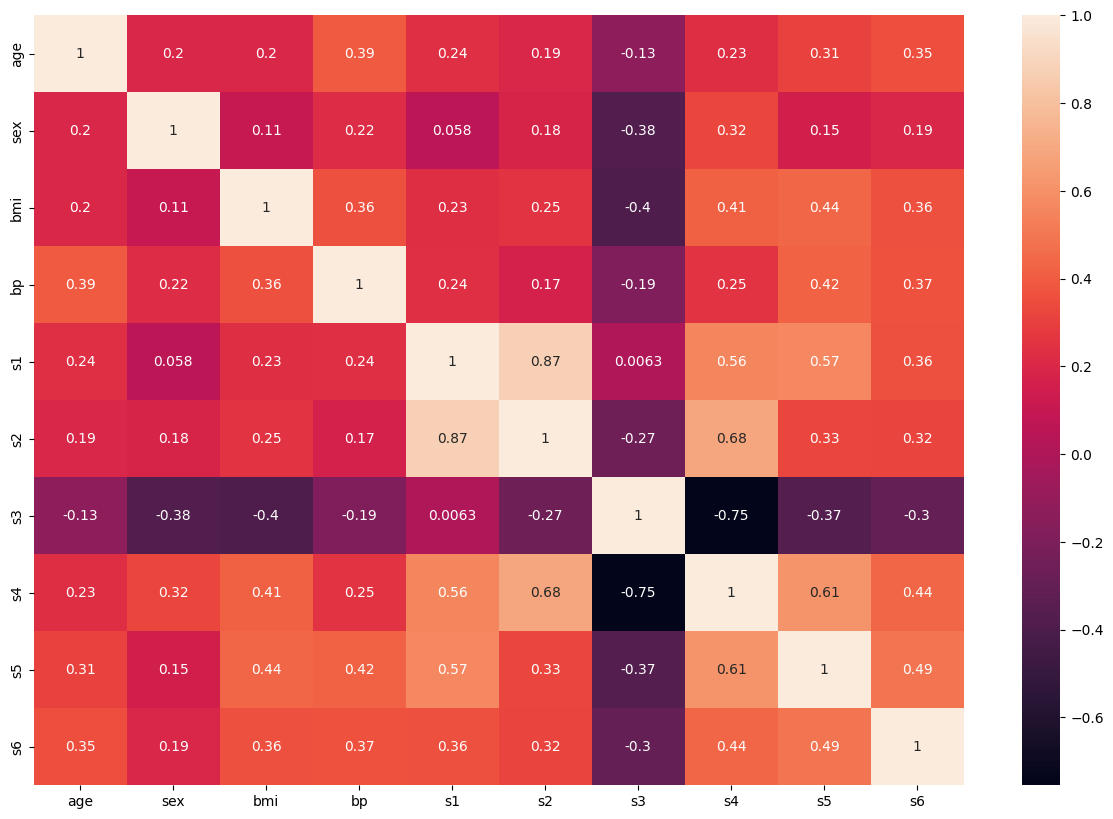

In [16]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot= True)

In [17]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor, params, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [19]:
grid.fit(X_train, y_train)

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\Coding\ML COURSE\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
y_pred = grid.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

In [25]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

4143.327761758073
0.3452049419869698
4143.327761758073


[Text(0.5120192307692307, 0.9166666666666666, 'x[7] <= -0.013\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.30288461538461536, 0.75, 'x[2] <= -0.053\nfriedman_mse = 3094.691\nsamples = 115\nvalue = 110.07'),
 Text(0.407451923076923, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[3] <= -0.012\nfriedman_mse = 1368.264\nsamples = 31\nvalue = 84.161'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[9] <= -0.069\nfriedman_mse = 766.07\nsamples = 25\nvalue = 74.64'),
 Text(0.038461538461538464, 0.25, 'x[0] <= -0.062\nfriedman_mse = 1046.917\nsamples = 6\nvalue = 99.5'),
 Text(0.019230769230769232, 0.08333333333333333, 'friedman_mse = 20.25\nsamples = 2\nvalue = 138.5'),
 Text(0.057692307692307696, 0.08333333333333333, 'friedman_mse = 419.5\nsamples = 4\nvalue = 80.0'),
 Text(0.11538461538461539, 0.25, 'x[3] <= -0.025\nfriedman_mse = 420.587\nsamples = 19\nvalue = 66.789'),
 Text(0.09615384615384616, 0.08333333333333333, 'friedman_mse

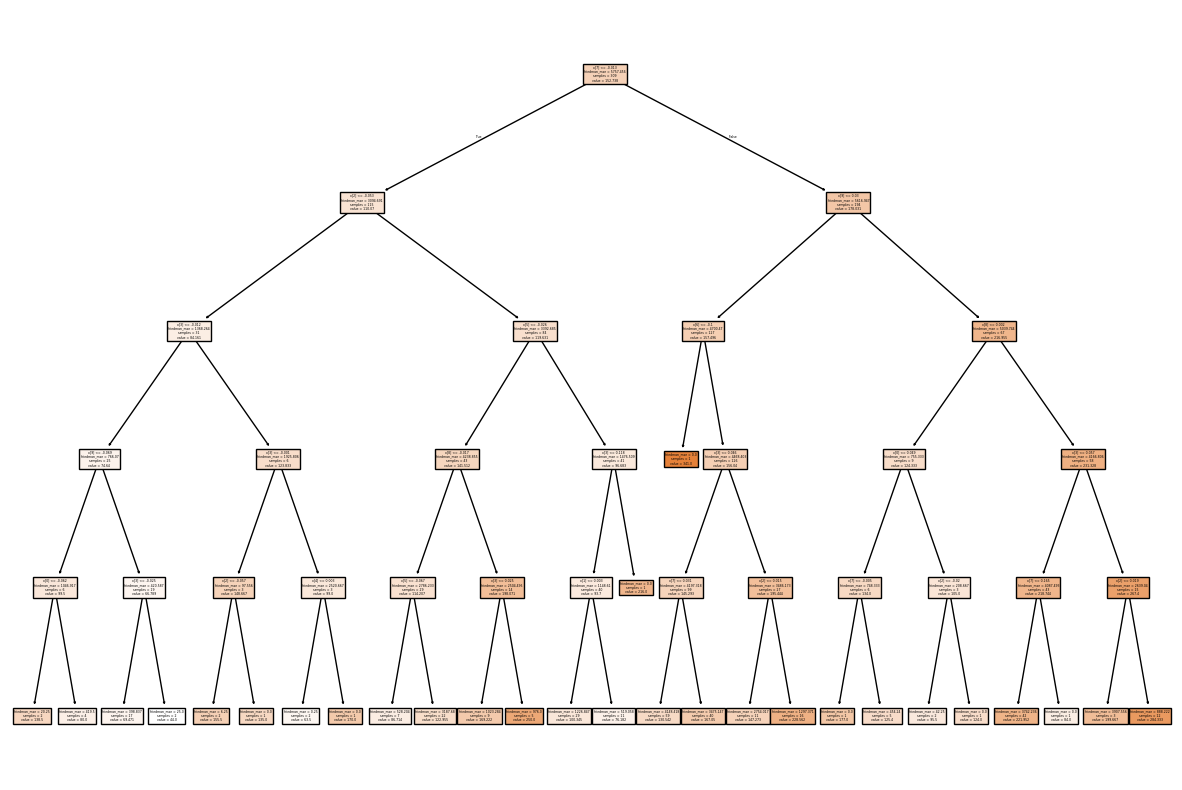

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(grid.best_estimator_, filled=True)